<a href="https://colab.research.google.com/github/amikoshimrah/Deployment/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Load Data
df = pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [ ]:
# since most of the columns are having null value. lets drop
df = df.dropna()


In [ ]:
# Split features and target
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the Neural Network
model = Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
# Addressing Class Imbalance
class_weight = {0: 1, 1: 300}

'''
Misclassifying a fraudulent transaction is treated as 300 times more costly than
misclassifying a legitimate one.
'''

In [ ]:
# Train the Model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=2048,
                    validation_split=0.2, verbose=1, class_weight=class_weight)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5509 - auc: 0.8583 - loss: 0.9934 - val_accuracy: 0.8118 - val_auc: 0.8707 - val_loss: 0.5582
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7619 - auc: 0.9403 - loss: 0.7138 - val_accuracy: 0.9547 - val_auc: 0.8809 - val_loss: 0.4264
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8790 - auc: 0.9252 - loss: 0.6352 - val_accuracy: 0.9896 - val_auc: 0.8944 - val_loss: 0.3379
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9283 - auc: 0.9602 - loss: 0.5025 - val_accuracy: 0.9968 - val_auc: 0.9152 - val_loss: 0.2735
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9602 - auc: 0.9713 - loss: 0.4104 - val_accuracy: 0.9982 - val_auc: 0.9328 - val_loss: 0.2154
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9738 - auc: 0.9503 - loss: 0.4354 - val_accuracy: 0.9986 - val_auc: 0.9485 - val_loss: 0.1762
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

In [ ]:
# Predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13057
         1.0       0.59      0.94      0.73        34

    accuracy                           1.00     13091
   macro avg       0.80      0.97      0.86     13091
weighted avg       1.00      1.00      1.00     13091

Confusion Matrix:
 [[13035    22]
 [    2    32]]
AUC-ROC Score: 0.9826552356410129


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

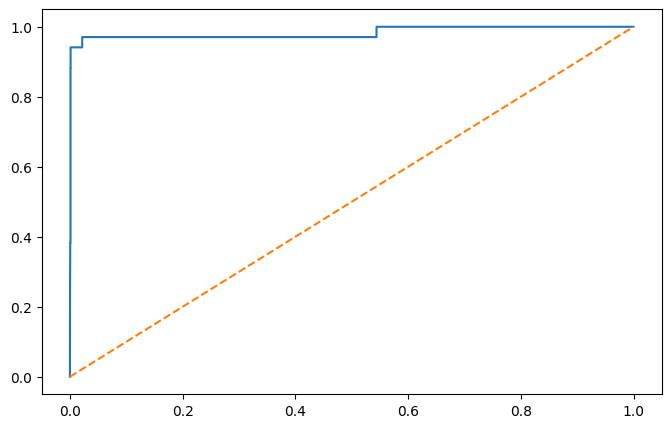

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt

**Inference (What to Expect):**

The model should achieve AUC-ROC > 0.95, which is good for fraud detection.

**The recall (sensitivity)** for class 1 (fraud) is critical—tuning class_weight helps catch more frauds.

**Precision** may decrease slightly due to more false positives—but this is often acceptable in fraud detection.